In [48]:
import os

from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 6]

In [53]:
import re
from datetime import timedelta
def parse_line(filename):
    with open(filename) as f:
        file = f.read()
        
    stats_regex = "\[(?P<epoch>[0-9]+)\] - (.*) - (\d+\.\d+),(\d+\.\d+),(\d+\.\d+)"
    stats_regex = re.compile(stats_regex)
    stats_match = stats_regex.findall(file)
    
    time_regex = "\[([0-9]+)\] - (.*) - (\d\:\d+\:\d+\.\d+)"
    time_regex = re.compile(time_regex)
    times = time_regex.findall(file)
    
    stats = [(int(x[0]), x[1], float(x[2]), float(x[3]), float(x[4])) for x in stats_match]
    #time_matches = [(int(x[0]), x[1], float(x[2]), float(x[3])) for x in stats_match]
    
    train_stats = [x for x in stats if "train" in x[1]]
    train_times = [x for x in times if "train" in x[1]]
    
    eval_stats = [x for x in stats if "eval" in x[1]]
    eval_times = [x for x in times if "eval" in x[1]]

    return train_stats, train_times, eval_stats, eval_times

In [59]:
def plot_losses(filename):
    train_stats, train_times, eval_stats, eval_times= parse_line(filename)
    
    plt.plot([x[0] for x in train_stats], [x[3] for x in train_stats])
    plt.plot([x[0] for x in eval_stats], [x[3] for x in eval_stats])
    plt.grid(True)
    plt.title(filename)
    plt.xlabel("Epoch")
    plt.ylabel("Top1 Accuracy")
    plt.show()

In [79]:
def plt_multiple(folder):
    files= [os.path.join(root, file) for root, subdir, files in os.walk(folder) for file in files if file == "training.log"]
    files = sorted(files, key=os.path.getmtime)
    for file in files:
        plot_losses(file)

def print_results(folder):
    files= [(root,os.path.join(root, file)) for root, subdir, files in os.walk(folder) for file in files if file == "training.log"]
    files = sorted(files, key= lambda x: os.path.getmtime(x[1]))
    for root, file in files:
        train_stats, train_times, eval_stats, eval_times= parse_line(file)
        max_acc = max(eval_stats, key=lambda x:x[3])
        print(f"{root:<50} {max_acc[3]}")

./logs/norm_tests2/xsub_joints_none                0.8818840579710145
./logs/norm_tests2/xsub_joints_mean_spine          0.8831521739130435
./logs/norm_tests2/xsub_joints_spine               0.8604468599033817
./logs/norm_tests2/xsub_joints_screen              0.8719202898550724
./logs/norm_tests2/xsub_joints_relative            0.8625
./logs/norm_tests2/xsub_joints_spine_align         0.9047705314009662
./logs/norm_tests2/xsub_joints_mean_spine_align    0.9070048309178744


In [ ]:
print_results("./logs/norm_tests2")

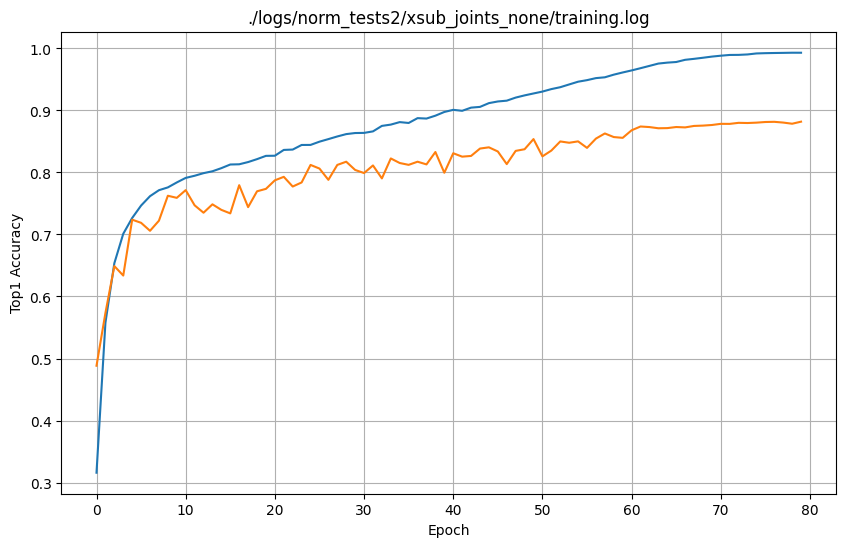

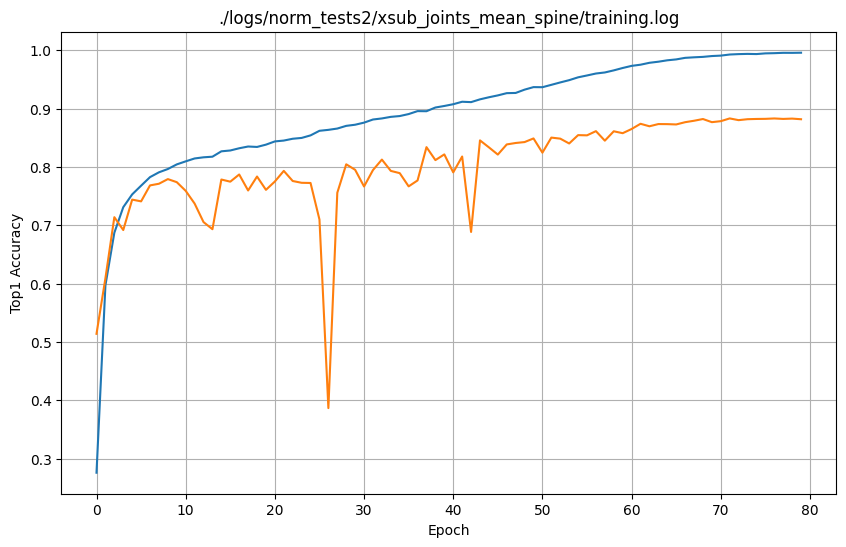

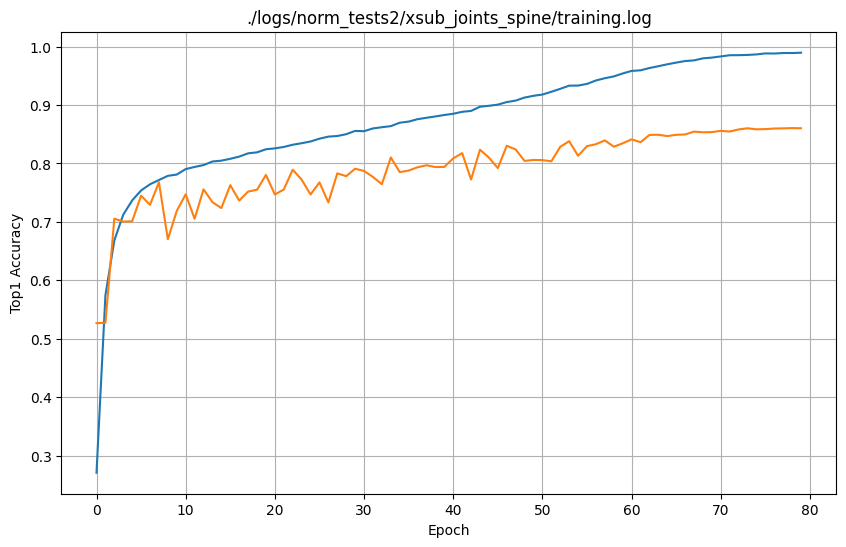

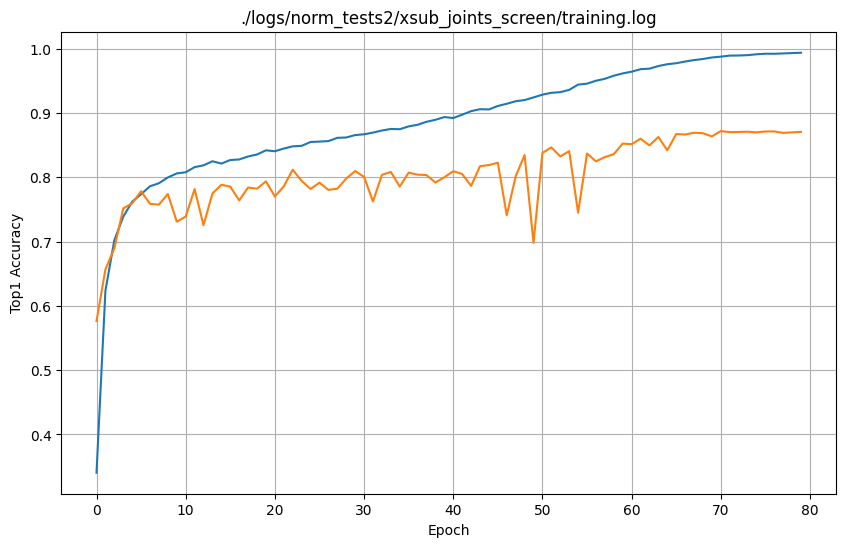

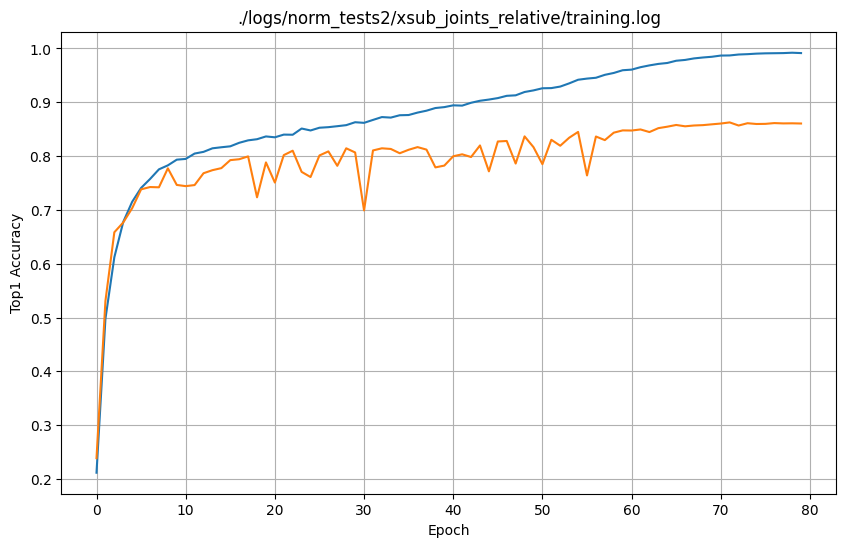

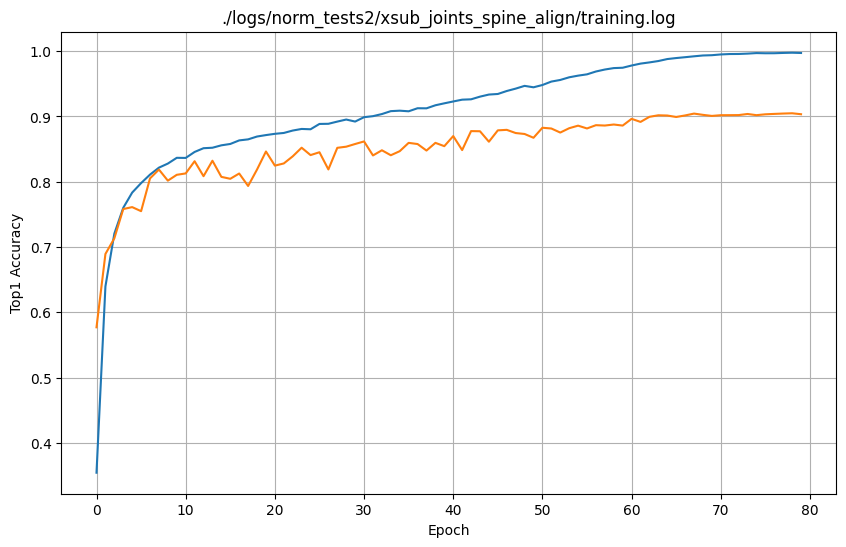

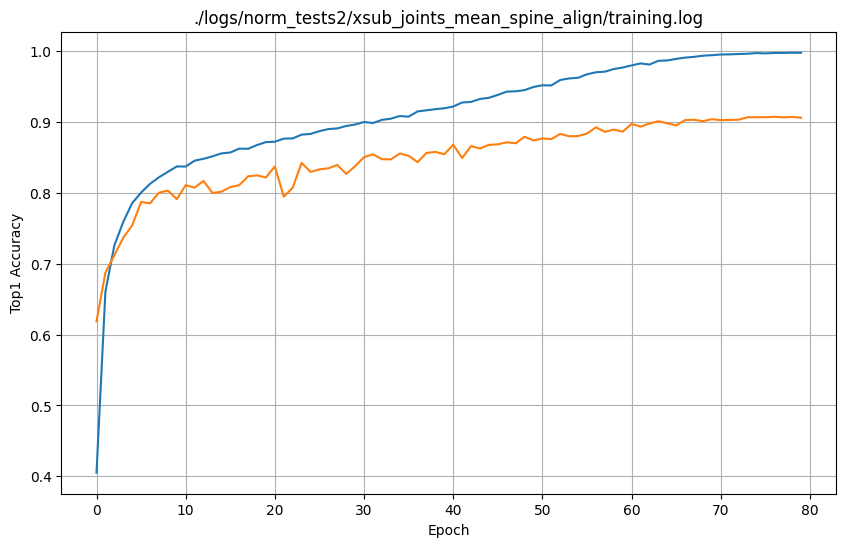

In [82]:
plt_multiple("./logs/norm_tests2")

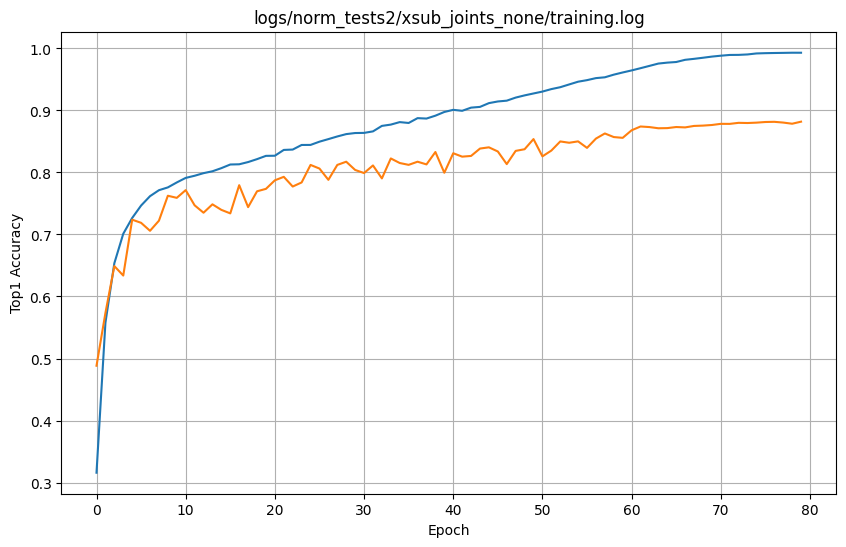

In [80]:
plot_losses("logs/norm_tests2/xsub_joints_none/training.log")

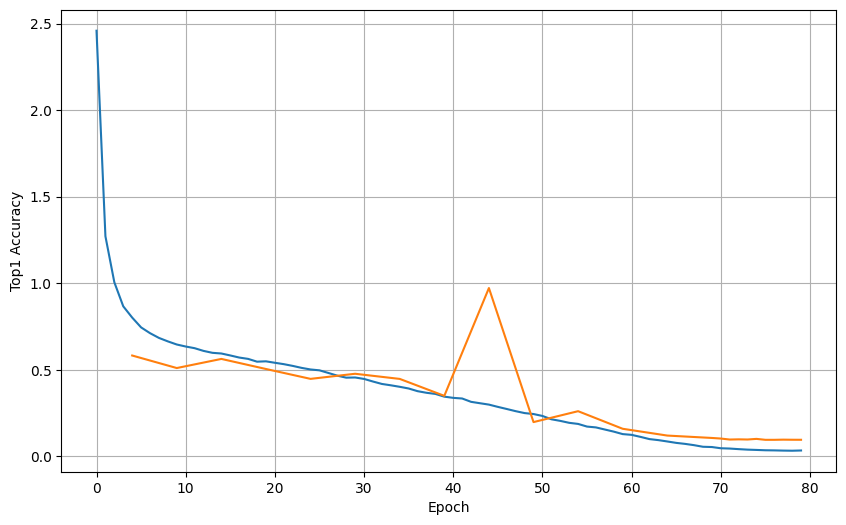

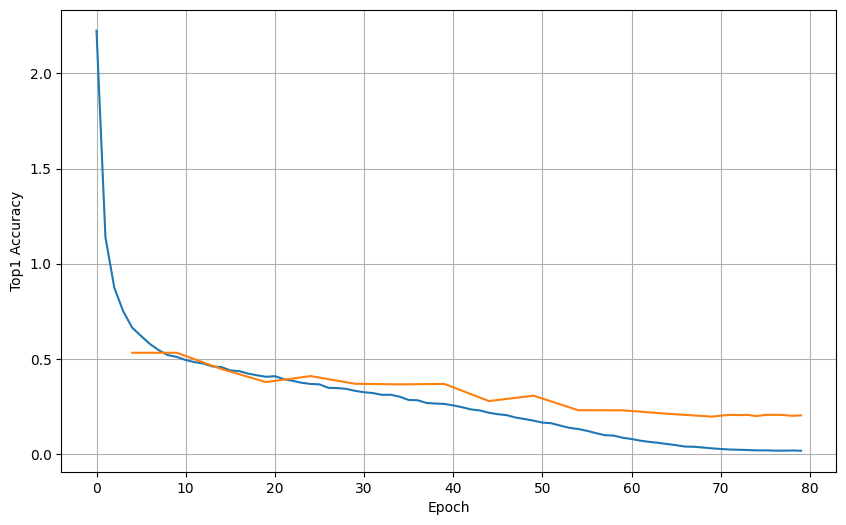

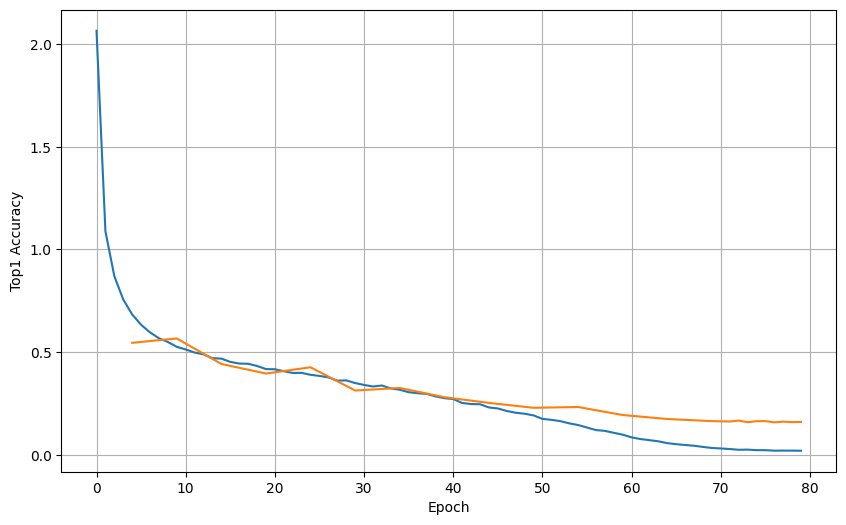

In [43]:
plot_losses("logs/xview_jo/training.log")
plot_losses("logs/xview_jore/training.log")
plot_losses("logs/xview_bo/training.log")

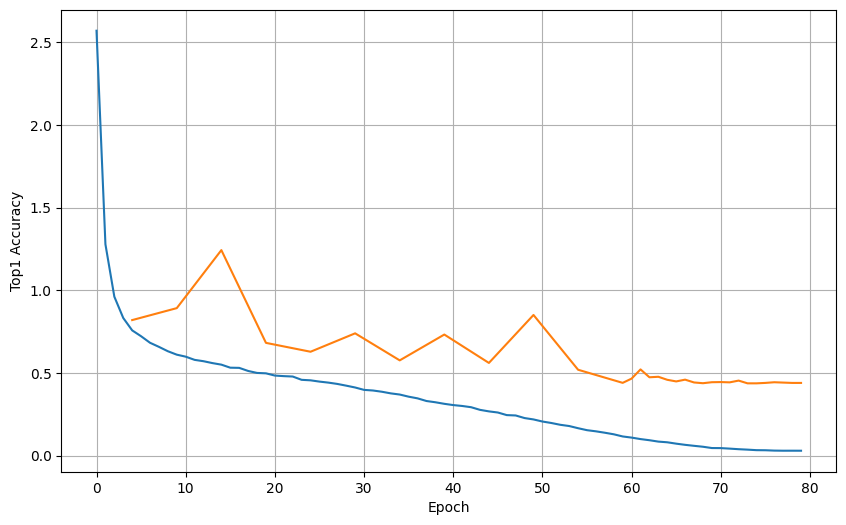

In [44]:
plot_losses("logs/norm_tests/xsub_joints_spine/training.log")

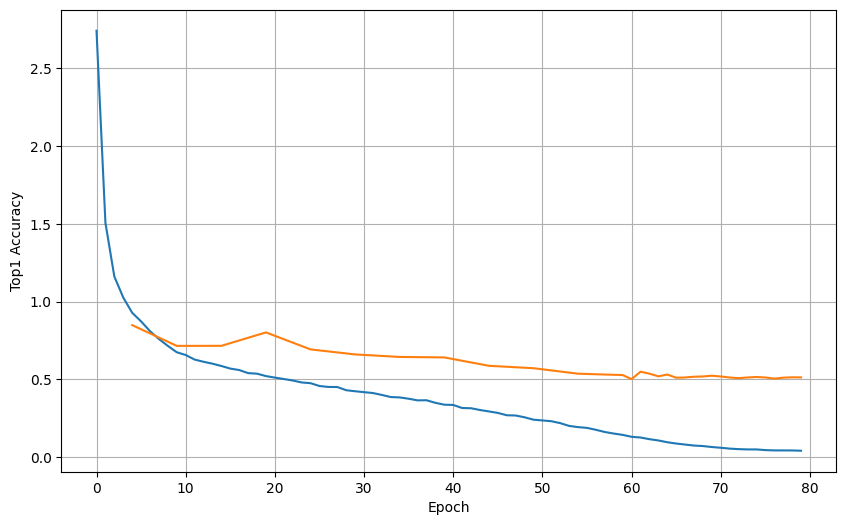

In [45]:
plot_losses("logs/norm_tests/xsub_joints_relative/training.log")

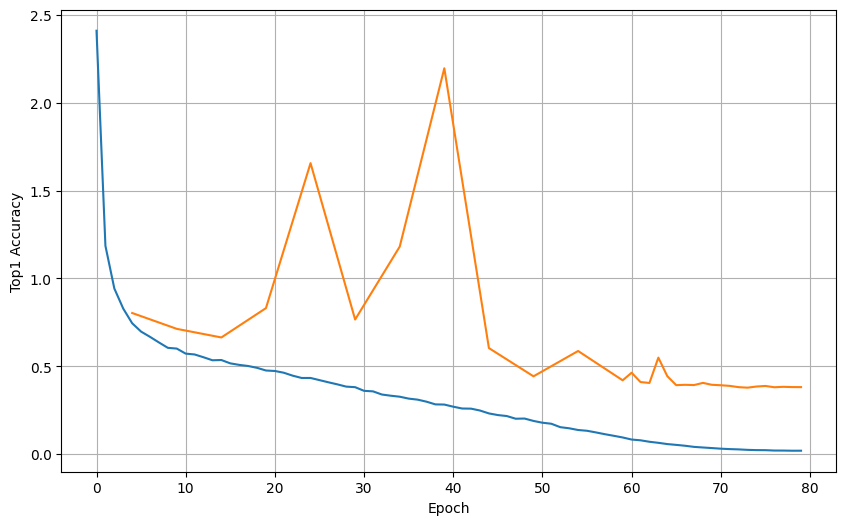

In [46]:
plot_losses("logs/norm_tests/xsub_joints_screen/training.log")

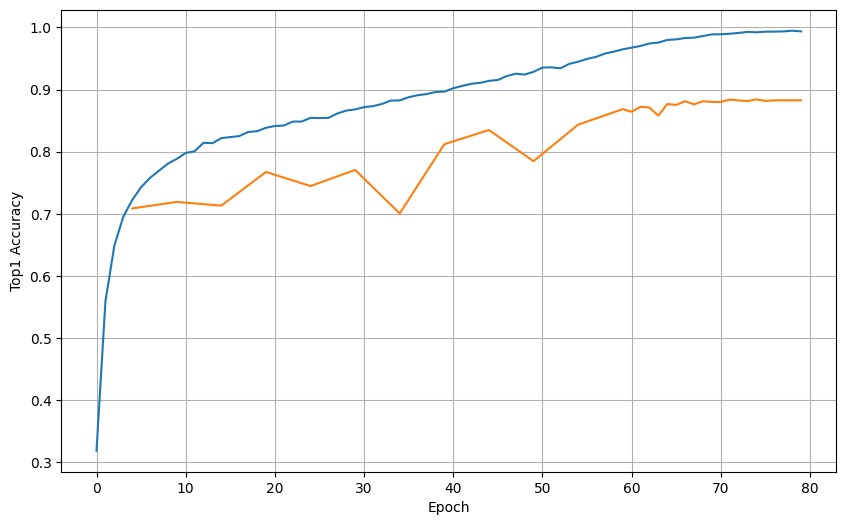

In [32]:
plot_losses("logs/norm_tests/xsub_joints_mean_spine/training.log")